<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
*	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
*	balcony — число балконов
*	ceiling_height — высота потолков (м)
*	cityCenters_nearest — расстояние до центра города (м)
*	days_exposition — сколько дней было размещено объявление (от публикации до снятия)
*	first_day_exposition — дата публикации
*	floor — этаж
*	floors_total — всего этажей в доме
*	is_apartment — апартаменты (булев тип)
*	kitchen_area — площадь кухни в квадратных метрах (м²)
*	last_price — цена на момент снятия с публикации
*	living_area — жилая площадь в квадратных метрах (м²)
*	locality_name — название населённого пункта
*	open_plan — свободная планировка (булев тип)
*	parks_around3000 — число парков в радиусе 3 км
*	parks_nearest — расстояние до ближайшего парка (м)
*	ponds_around3000 — число водоёмов в радиусе 3 км
*	ponds_nearest — расстояние до ближайшего водоёма (м)
*	rooms — число комнат
*	studio — квартира-студия (булев тип)
*	total_area — площадь квартиры в квадратных метрах (м²)
*	total_images — число фотографий квартиры в объявлении

Исследование включает в себя следующие этапы:
* Изучение данных
* Предобработка данных
* Расчет новых значений
* Изучение параметров и выявление зависимостей

В результате исследования будут выявлены параметры, влияющие на рыночную стоимость недвижимости

## Изучение данных из файла

In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
pth1 = 'real_estate_data.csv'
pth2 = '/datasets/real_estate_data.csv'

In [3]:
if os.path.exists(pth1):
  data = pd.read_csv(pth1, sep='\t')
else:
  data = pd.read_csv(pth2, sep='\t')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод**

Итак, в таблице 22 столбца. В их названиях стилистических нарушений или ошибок нет. Количество значений в столбцах отличается, значит, есть пропущенные значения. В некоторых столбцах (например, дата первой публикации) нужно поменять тип данных на соответствующие. Пропуски, там где это возможно, необходимо заполнить.

## Предобработка данных

Изучим пропущенные значения и обработаем их. 

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.isna().mean() #доля пропусков

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

Среди выявленных пропусков мы не можем заполнить значения в столбцах "расстояние до центра города", "всего этажей в доме", "название населённого пункта", "число парков в радиусе 3 км", "расстояние до ближайшего парка", "число водоёмов в радиусе 3 км, "расстояние до ближайшего водоёма", "расстояние до ближайшего аэропорта в метрах ".

Мы можем попробовать заполнить пропуски в столбцах "высота потолков", "жилая площадь", "площадь кухни", "число балконов". Пропуски в столбце "число балконов" можно заменить на 0, так как, скорее всего, если их число не указано, то их нет. Также заменим здесь тип данных на int. Остальные пропуски можно заменить соответствующими медианными значениямим.

In [8]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [9]:
data['living_area'].corr(data['rooms'])

0.8459774567888756

Кэоэффициент корреляции колонок "число комнат" и "жилая площадь" достаточно высок, поэтому заменим пропуски в колонке "жилая площадь" медианами, соответствующими числу комнат.
Пропущенные значение столбца "площадь кухни" также заполним в соответствии с числом комнат, так как разброс очень большой и было бы неправильно заполнять это просто медианой столбца

In [10]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()
    data.loc[(data['rooms'] == i) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == i), 'kitchen_area'].median()
    
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,45.0,9,NaN,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Значения столбца "высота потолков" не зависят от других значений таблицы. Заменим пропуски в нем медианным значением по столбцу.

In [11]:
data['ceiling_height'].median()

2.65

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,45.0,9,NaN,...,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропущенные значения в столбце 'is_apartment' можно объяснить так же, как в случае с балконами. Вероятно, этот параметр не указывался в объявлениях. Пропуски можно заменить на False

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Поменяем тип данных колонки "first_day_exposition" на datetime. Время указывать не будем, так как оно везде одинаковое: 00:00:00

In [14]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%d'
)

Также поменяем тип данных в столбце "last_price" для более удобного отображения и дальнейших операций со столбцом

In [15]:
data['last_price'] = data['last_price'].astype('int')

Заполним пропуски в столбце 'days_exposition' на нулевые значения и изменим тип данных. Это пригодится для дальнейших действий со столбцом

In [16]:
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [17]:
isna_date = data.query('days_exposition == days_exposition.isna()').pivot_table(index='first_day_exposition', values='days_exposition', aggfunc='count')
isna_date.columns=['days_exposition']
isna_date.reset_index()

,first_day_exposition,days_exposition
0,2014-11-27,3
1,2014-12-08,1
2,2014-12-09,7
3,2014-12-10,3
4,2014-12-11,2
...,...,...
703,2019-04-29,36
704,2019-04-30,25
705,2019-05-01,29
706,2019-05-02,11


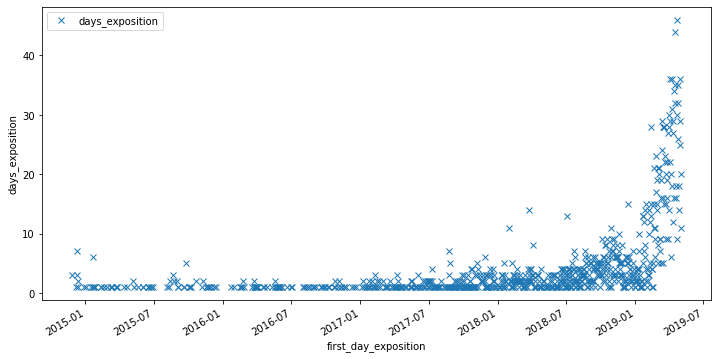

In [18]:
ax = isna_date.plot(style='x', figsize=(12,6))
ax.set_xlabel('first_day_exposition')
ax.set_ylabel('days_exposition');

Проверим, что там, где мы заполняли пропущенные значения, пропусков нет

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

In [20]:
data[(data['kitchen_area'].isna()) & (data['rooms'] == 0)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,2.65,24.0,15.50,2,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181
349,4,2320000,25.00,2017-09-27,0,2.65,14.0,17.00,1,False,...,NaN,0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45
440,8,2480000,27.11,2018-03-12,0,2.65,17.0,24.75,4,False,...,NaN,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64
508,0,3375000,34.40,2017-03-28,0,2.65,26.0,24.30,19,False,...,NaN,1,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430
608,2,1850000,25.00,2019-02-20,0,2.65,10.0,18.00,7,False,...,NaN,0,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26.00,2017-09-01,0,2.65,25.0,18.00,16,False,...,NaN,0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14
23442,0,2500000,27.70,2017-09-28,0,2.65,24.0,18.00,4,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4
23554,15,3350000,26.00,2018-09-07,0,2.65,19.0,18.00,8,False,...,NaN,0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31
23592,10,1450000,29.00,2017-11-11,0,2.65,9.0,18.00,8,False,...,NaN,2,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82


В столбце "площадь кухни" остались пропуски в тех строках, где число комнат = 0, так как значения мы подставляли на основании этого столбца

In [21]:
data.duplicated().sum()

0

Дубликатов в таблице нет

In [22]:
data[['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']] = data[['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']].astype('float32')      

## Расчёты и добавление результатов в таблицу

Добавим столбец с ценой за квадратный метр 

In [23]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']

Добавим день недели, месяц и год публикации объявления

In [24]:
data['day_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

Также добавим столбец, описывающий этажи квартиры: варианты — первый, последний, другой. Сделаем это, написав функцию, распределящую этажи по категориям

In [25]:
def floor_describe(row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == last_floor:
        return 'последний'
    return 'другой'    

In [26]:
data['floor_describe'] = data.apply(floor_describe, axis = 1)

И добавим соотношение жилой и общей площади, а также отношение площади кухни к общей

In [27]:
data['ratio_of_living_and_total'] = data['living_area'] / data['total_area']
data['ratio_of_kitchen_total'] = data['kitchen_area'] / data['total_area']

Проверим, что все столбцы добавились в таблицу

In [28]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_week_exposition,month_exposition,year_exposition,floor_describe,ratio_of_living_and_total,ratio_of_kitchen_total
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.0,0.0,120370.367188,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,2.65,11.0,18.600000,1,False,...,0.0,NaN,81.0,82920.789062,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,2.65,5.0,34.299999,4,False,...,2.0,574.0,558.0,92785.710938,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,2.65,14.0,45.000000,9,False,...,3.0,234.0,424.0,408176.093750,4,7,2015,другой,0.283019,0.059748
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


## Исследовательский анализ данных

**Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.**

***Площадь***

In [29]:
data['total_area'].describe()

count    23699.000000
mean        60.348774
std         35.654266
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

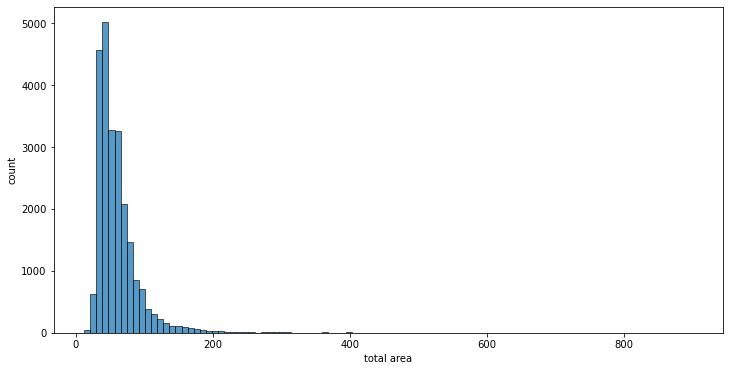

In [81]:
plt.figure(figsize=(12,6))
sns.histplot(data["total_area"], bins=100)
plt.xlabel('total area')
plt.ylabel('count');

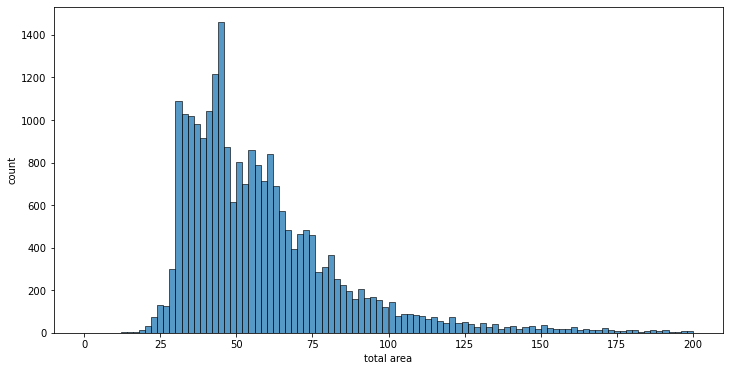

In [82]:
plt.figure(figsize=(12,6))
sns.histplot(data["total_area"], binrange = (0,200), bins=100)
plt.xlabel('total area')
plt.ylabel('count');

Распределение данных нормальное. Общая площадь в выборке находится в диапазоне 12 - 900 кв.м. Среднее значение - 60 кв.м.

***Цена***

In [32]:
data['last_price'].describe()

count        23699.0
mean       6541550.0
std       10886946.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

Данные отображаются экспоненциальной записью, поэтому уменьшим их значения

In [33]:
data['last_price'] = data['last_price'] / 1000000

In [34]:
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

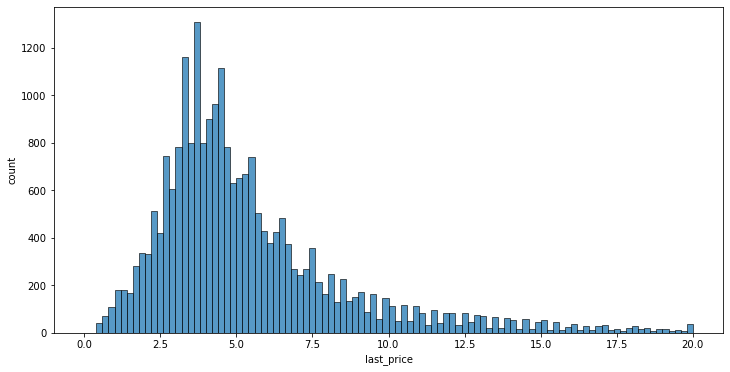

In [84]:
plt.figure(figsize=(12,6))
sns.histplot(data["last_price"],  binrange = (0,20), bins=100)
plt.xlabel('last_price')
plt.ylabel('count');

Распределение данных нормальное. Цены находятся в диапазоне 12190 - 763000000 рублей. Среднее значение 6.5 млн рублей. Есть странные значения вроде 12 тысяч рублей за квартиру. 

***Число комнат***

In [36]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

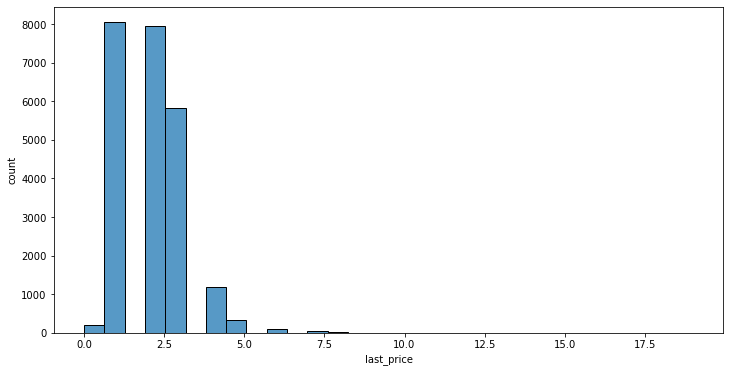

In [85]:
plt.figure(figsize=(12,6))
sns.histplot(data['rooms'], bins=30)
plt.xlabel('last_price')
plt.ylabel('count');

In [38]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

По графику можно сказать, что большую часть квартир, представленных на рынке недвижимости, составляют однокомнатные и двукомнатные квартиры

***Высота потолков***

In [39]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724142
std          0.988318
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

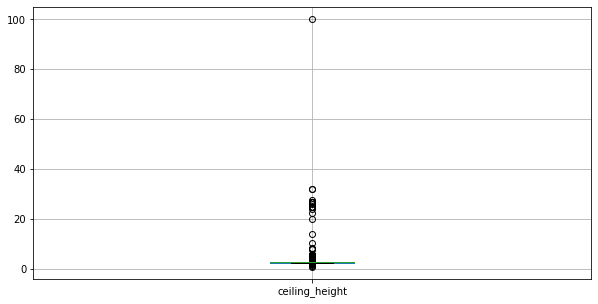

In [86]:
plt.figure(figsize=(10,5))
data.boxplot('ceiling_height');

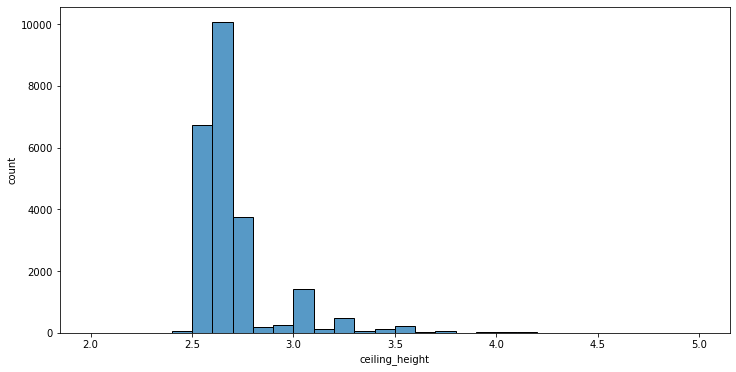

In [87]:
plt.figure(figsize=(12,6))
sns.histplot(data['ceiling_height'], binrange = (2,5), bins=30)
plt.xlabel('ceiling_height')
plt.ylabel('count');

In [42]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [43]:
ceiling_data = data.query('ceiling_height <= 2 or ceiling_height >= 8')
ceiling_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_week_exposition,month_exposition,year_exposition,floor_describe,ratio_of_living_and_total,ratio_of_kitchen_total
355,17,3.600,55.200001,2018-07-12,2,25.00,5.0,32.000000,2,False,...,NaN,NaN,259.0,65217.390625,3,7,2018,другой,0.579710,0.159420
552,11,2.999,33.500000,2017-03-30,1,2.00,15.0,17.500000,6,False,...,1.0,949.0,270.0,89522.390625,3,3,2017,другой,0.522388,0.194030
2572,4,2.400,62.000000,2018-12-27,3,2.00,5.0,40.000000,4,False,...,NaN,NaN,0.0,38709.675781,3,12,2018,другой,0.645161,0.096774
3148,14,2.900,75.000000,2018-11-12,3,32.00,3.0,53.000000,2,False,...,NaN,NaN,0.0,38666.667969,0,11,2018,другой,0.706667,0.106667
3474,3,1.400,30.000000,2018-03-16,1,8.00,5.0,15.300000,2,False,...,NaN,NaN,125.0,46666.667969,4,3,2018,другой,0.510000,0.243333
4212,1,2.120,35.430000,2017-12-18,1,2.00,18.0,16.600000,9,False,...,NaN,NaN,36.0,59836.296875,0,12,2017,другой,0.468529,0.248377
4643,0,4.300,45.000000,2018-02-01,2,25.00,9.0,30.000000,2,False,...,1.0,331.0,181.0,95555.554688,3,2,2018,другой,0.666667,0.155556
4876,7,3.000,25.000000,2017-09-27,0,27.00,25.0,17.000000,17,False,...,NaN,NaN,28.0,120000.000000,2,9,2017,другой,0.680000,NaN
5076,0,3.850,30.500000,2018-10-03,1,24.00,5.0,19.500000,1,True,...,1.0,578.0,7.0,126229.507812,2,10,2018,первый,0.639344,0.180328
5246,0,2.500,54.000000,2017-10-13,2,27.00,5.0,30.000000,3,False,...,NaN,NaN,540.0,46296.296875,4,10,2017,другой,0.555556,0.166667


Высота потолков варьируется в диапазоне 1 -100 м. Значения 1 и 100 являются странными для этого параметра. В среднем высота потолков составляет около 2.7 м.

**Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?**

Выведем информацию о столбце "Количество дней публикации", исключая нулевые значения, которые мы подставили

In [44]:
data[data['days_exposition'] != 0]['days_exposition'].describe()

count    20518.000000
mean       180.888641
std        219.728500
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

медиана = 95, среднее = 180

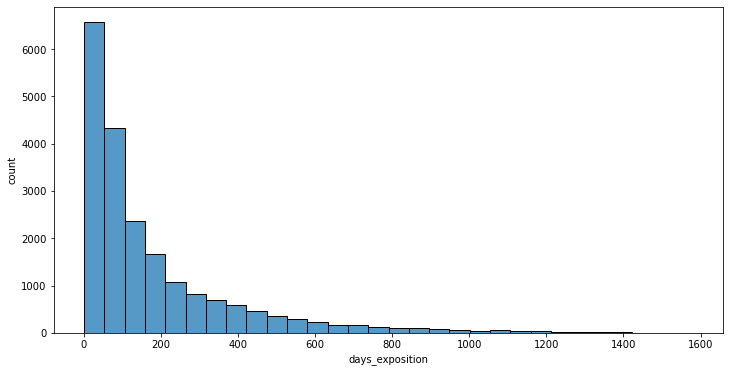

In [89]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['days_exposition'] != 0]['days_exposition'], bins=30)
plt.xlabel('days_exposition')
plt.ylabel('count');

Из этого графика видно, что в основном квартира снимается с продажи/объявление удаляется спусть примерно 100 дней.  Изменим диапазон

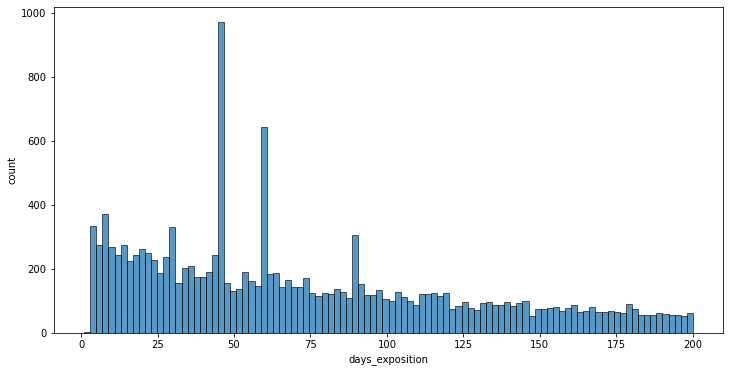

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['days_exposition'] != 0]['days_exposition'],binrange = (1, 200), bins=100)
plt.xlabel('days_exposition')
plt.ylabel('count');

In [47]:
data[data['days_exposition'] != 0]['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

Судя по этому графику, большое число объявлений снимается с продажи спустя определенное количество дней: 7,30 и 90. Наибольшие значения приходятся на 45 и 60 дней. Маловероятно, что это связано с реальной продажей квартиры. Вероятно, это связано с работой сервиса "Яндекс.Недвижимость" (https://yandex.ru/support/realty/owner/home/add-ads-housing.html) . Это аномалии, так что нужно удалить их из таблицы, чтобы они не влияли на результаты исследования

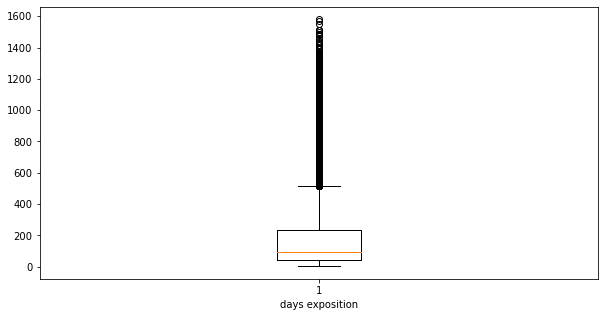

In [95]:
plt.figure(figsize=(10,5))
plt.boxplot(data[data['days_exposition'] != 0]['days_exposition'])
plt.xlabel('days exposition');

По диаграмме размаха мы видим, что нормальные значения лежат в границе 0-500, необоснованно быстрых значений нет, все остальное выбросы / необоснованно долгие значения. 

**Уберите редкие и выбивающиеся значения.**

Создадим новый датафрейм и запишем в него отфильтрованные данные (без аномалий) (исключим объявления, снятые с продажи через 7,30,45,60 дней и объвления, где указанная высота потолков больше 8м и меньше 2м)

In [49]:
new_data = data.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90 & ceiling_height <= 8 and ceiling_height > 2')

In [50]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18425 entries, 1 to 23697
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               18425 non-null  int64         
 1   last_price                 18425 non-null  float64       
 2   total_area                 18425 non-null  float32       
 3   first_day_exposition       18425 non-null  datetime64[ns]
 4   rooms                      18425 non-null  int64         
 5   ceiling_height             18425 non-null  float32       
 6   floors_total               18351 non-null  float32       
 7   living_area                18425 non-null  float32       
 8   floor                      18425 non-null  int64         
 9   is_apartment               18425 non-null  bool          
 10  studio                     18425 non-null  bool          
 11  open_plan                  18425 non-null  bool          
 12  kitc

In [51]:
new_data['days_exposition'].describe()

count    18425.000000
mean       195.901215
std        226.860733
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

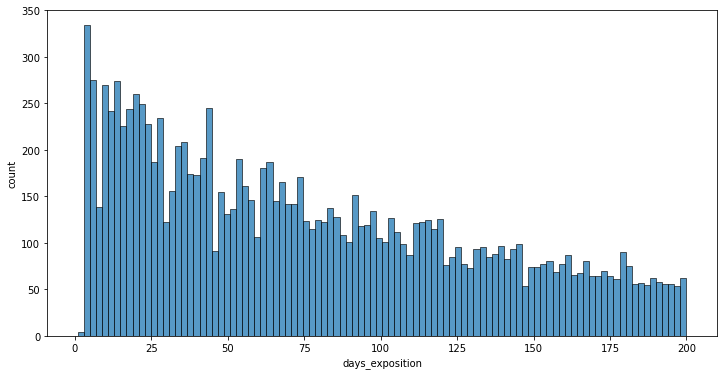

In [92]:
plt.figure(figsize=(12,6))
sns.histplot(new_data['days_exposition'],binrange = (1, 200), bins=100)
plt.xlabel('days_exposition')
plt.ylabel('count');

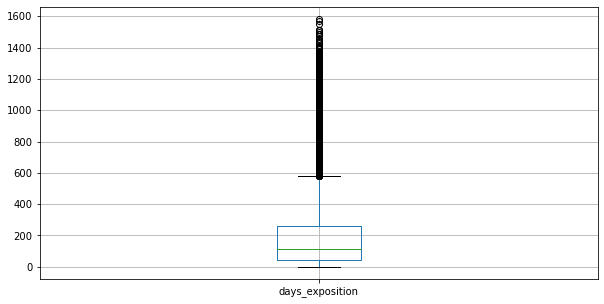

In [96]:
plt.figure(figsize=(10,5))
new_data.boxplot('days_exposition');

После удаления аномальных значений изменились среднее значение и медиана. Нормально диапазон теперь 0-600 дней 

In [54]:
new_data['ceiling_height'].describe()

count    18425.000000
mean         2.694005
std          0.223556
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.000000
Name: ceiling_height, dtype: float64

После удаления выбивающихся значений уменьшились среднее и медиана высоты потолков.

**Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.**

*цена в млн.руб*

**Зависимость цены от площади, числа комнат и удаленности от центра**

In [55]:
new_data[['last_price','total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.643427,0.354586,-0.191308
total_area,0.643427,1.000000,0.760909,-0.226669
rooms,0.354586,0.760909,1.000000,-0.185323
cityCenters_nearest,-0.191308,-0.226669,-0.185323,1.000000


***Зависимость цены:***

*от площади:* Коэффициент корреляции Пирсона равен 0.6. Связь есть, но не очень сильная. Чем больше площадь квартиры, тем немного выше ее стоимость. Но на ее стоимость могут влиять и другие факторы

*от числа комнат:* Взаимосвязь слабая, но она есть. При увеличении числа комнат цена немного растет, но есть случаи, когда квартиры с меньшим числом комнат стоят столько же, сколько квартиры с большим числом комнат

*от удаленности от центра:* Зависимость есть, но коэффициент корреляции низкий. Чем квартира дальше от центра, тем ее цена ниже

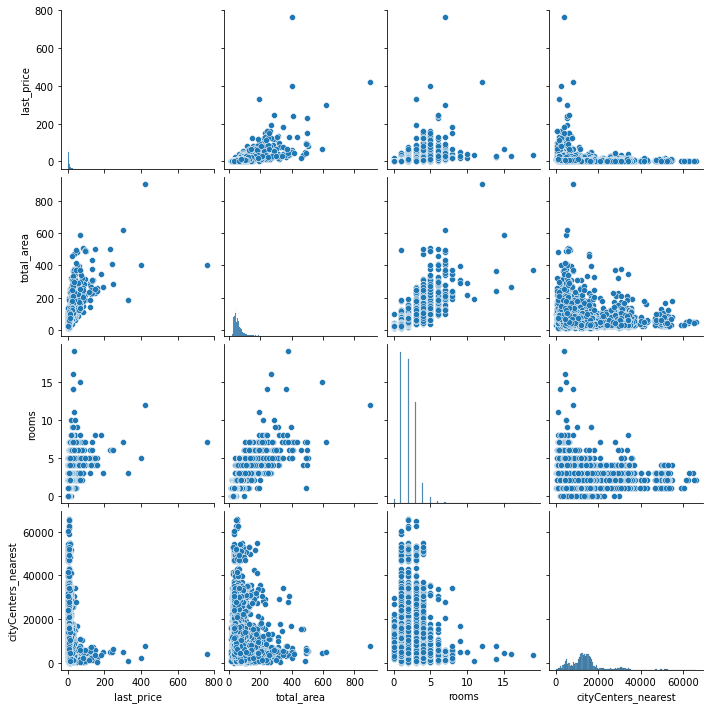

In [56]:
sns.pairplot(new_data[['last_price','total_area', 'rooms', 'cityCenters_nearest']]);

**Зависимость цены от этажа квартиры**

,last_price
floor_describe,
другой,4.70
первый,3.85
последний,4.30


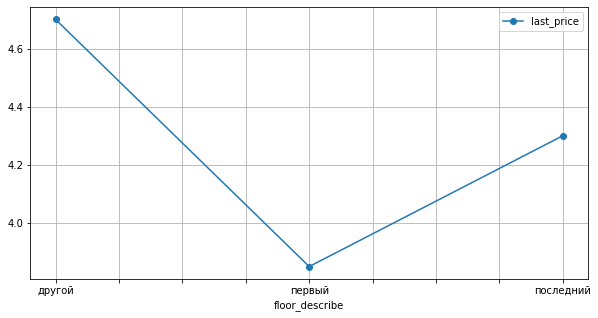

In [120]:
floor_pivot_table = new_data.pivot_table(index='floor_describe', values='last_price', aggfunc='median')
floor_pivot_table.plot(grid=True, style='o-', figsize=(10,5))
floor_pivot_table

Квартиры на 1 этаже стоят дешевле, чем на остальных этажах примерно в 1.2 раза

**Зависимость цены от дня недели размещения объявления**

,last_price
day_week_exposition,
0,4.550
1,4.650
2,4.600
3,4.600
4,4.500
5,4.500
6,4.479


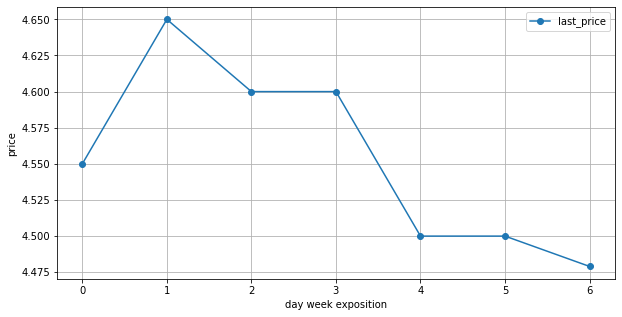

In [121]:
day_pivot_table = new_data.pivot_table(index = 'day_week_exposition', values = 'last_price', aggfunc='median')
day_pivot_table.plot(grid=True, style='o-', figsize=(10,5))
plt.xlabel('day week exposition')
plt.ylabel('price');
day_pivot_table

Судя по графику, квартиры с наибольшей ценой выставляются на продажу во вторник, а к концу недели цены выставленных квартир снижаются. Объявления с квартирами с наименьшей стоимостью публикуются в воскресенье

**Зависимость цены от месяца размещения объявления**

,median,count
month_exposition,,
1,4.6000,1124
2,4.6000,2011
3,4.5000,1772
4,4.5500,1406
5,4.6000,1054
6,4.4500,1515
7,4.5000,1391
8,4.5000,1454
9,4.6900,1689


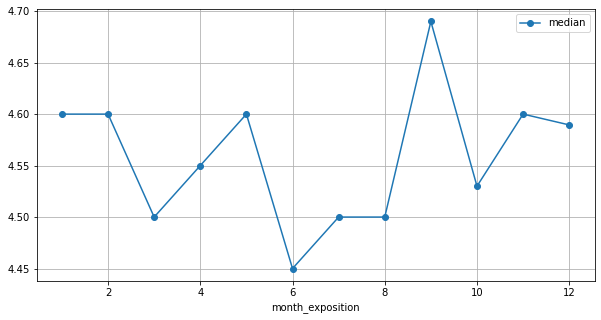

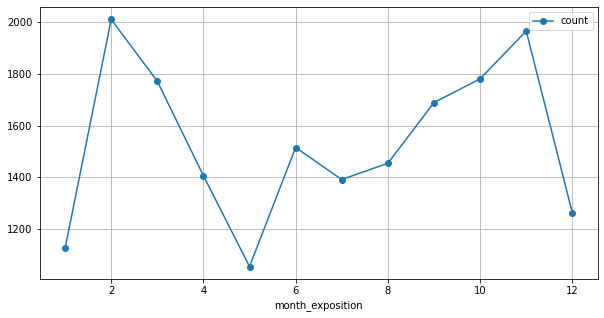

In [122]:
month_pivot_table = new_data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc=['median', 'count'])
month_pivot_table.columns=['median', 'count']
month_pivot_table.plot(y='median', grid=True, style='o-', figsize=(10,5))
month_pivot_table.plot(y='count', grid=True, style='o-', figsize=(10,5))
month_pivot_table

Самая высокая стоимость квартир в сентябре, самая низкая - в июне. Это может быть связано с тем, что летом люди более настроены на отдых, чем на покупку/продажу квартиры. Количество выставляемых объявлений в этот период так же не высоко. С последнего месяца лета и по ноябрь растет количество выставляемых кварти и в этом же периоде(сентябрь) их цена наиболее высокая. Это может быть связано так же со спросом, так как в это время много тех, кто перезжает в город из-за учебы/работы и нуждается в квартире. 

**Зависимость цены от года размещения объявления**

,median,count
year_exposition,,
2014,7.2650,119
2015,5.2445,1120
2016,4.5500,2584
2017,4.5000,7198
2018,4.5000,6478
2019,4.8000,926


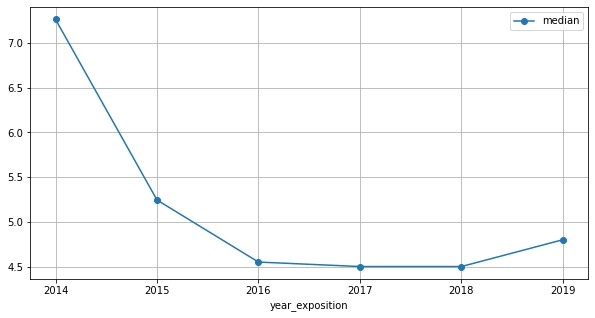

In [123]:
year_pivot_table = new_data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc=['median', 'count'])
year_pivot_table.columns=['median', 'count']
year_pivot_table.plot(y='median', grid=True, style='o-', figsize=(10,5))
year_pivot_table

С 2014 года по 2018 цена квартир уменьшалась, а после 2018 немного возросла. Это снижение можно объяснить политической и экономической ситуацией в стране на фоне событий 2014 года. 

**Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.**

In [61]:
locality_pivot_table = new_data.pivot_table(index='locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'] )
locality_pivot_table.columns=['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values(by='count', ascending=False)
locality_pivot_table.head(10)

,count,mean
locality_name,,
Санкт-Петербург,12399,112310.210938
посёлок Мурино,468,85630.609375
посёлок Шушары,359,78209.187500
Всеволожск,305,68612.109375
Пушкин,283,102690.648438
Колпино,273,75145.101562
деревня Кудрово,265,92234.335938
посёлок Парголово,261,89777.773438
Гатчина,240,67332.039062


Самая высокая стоимость жилья среди населенных пунктов с наибольшим числом объявлений в Санкт-Петербурге (112307 р/кв.м, самая низкая - в Выборге(56983 р/кв.м)

**Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.**

Так как мы не можем заполнить пропуски в рассматриваемом столбце, а он нам нужен, мы заполним их нулевыми значениями и в дальнейшем исключим из анализа.

In [62]:
new_data['cityCenters_nearest_km'] = new_data['cityCenters_nearest'] / 1000
new_data['cityCenters_nearest_km'] = new_data['cityCenters_nearest_km'].fillna(0)
new_data['cityCenters_nearest_km'] = new_data['cityCenters_nearest_km'].astype('int')

,last_price
cityCenters_nearest_km,
1,16.876626
2,16.012542
3,13.813415
4,12.855650
5,15.509068
6,12.825458
7,13.202758
8,7.869041
9,6.148440


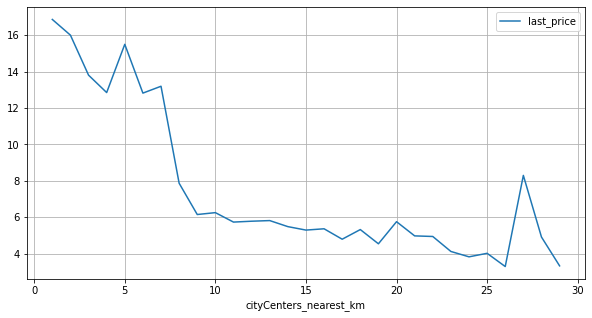

In [125]:
center_pivot_table = new_data.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km != 0').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
center_pivot_table.plot(grid=True, figsize=(10,5))
center_pivot_table

Судя по графику центром считается радиус 7 км

**Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.**

Создадим новый датафрейм, куда включим только квартиры Санкт-Петербурга с рассточнием до центра не более 7км

In [64]:
spb_center = new_data.query('locality_name == "Санкт-Петербург" & cityCenters_nearest_km <= 7')

***Площадь***

In [65]:
spb_center['total_area'].describe()

count    2872.000000
mean       90.260376
std        60.128170
min        12.000000
25%        54.000000
50%        75.549999
75%       106.000000
max       900.000000
Name: total_area, dtype: float64

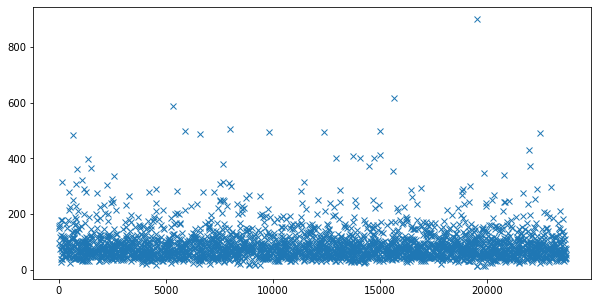

In [130]:
spb_center['total_area'].plot(style='x', figsize=(10,5));

Как и в общей выборке, диапазон площадей квартир составляет 12-900 кв.м., а среднее значение - 90 кв.м., что больше, чем по всей базе

***Цена***

In [67]:
spb_center['last_price'].describe()

count    2872.000000
mean       14.353758
std        26.248438
min         1.600000
25%         6.347000
50%         8.600000
75%        13.320850
max       763.000000
Name: last_price, dtype: float64

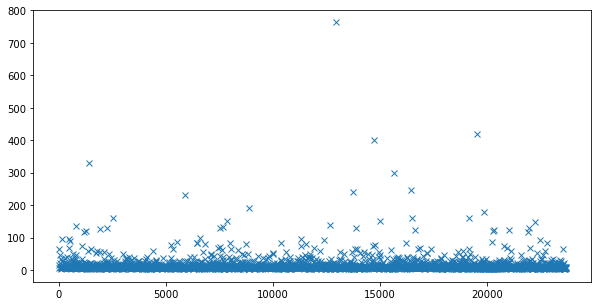

In [131]:
spb_center['last_price'].plot(style='x', figsize=(10,5));

Минимальная цена квартиры в центре составляет 1,6 млн рублей, а максималньая - 763 млн рублей. Средняя цена - 14.3 млн рублей, что, естественно больше, чем по всей базе

Число комнат

In [69]:
spb_center['rooms'].describe()

count    2872.000000
mean        2.768106
std         1.452074
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [70]:
spb_center['rooms'].value_counts()

3     879
2     868
1     463
4     375
5     169
6      56
7      33
0      10
8       9
10      2
14      2
11      1
19      1
9       1
15      1
16      1
12      1
Name: rooms, dtype: int64

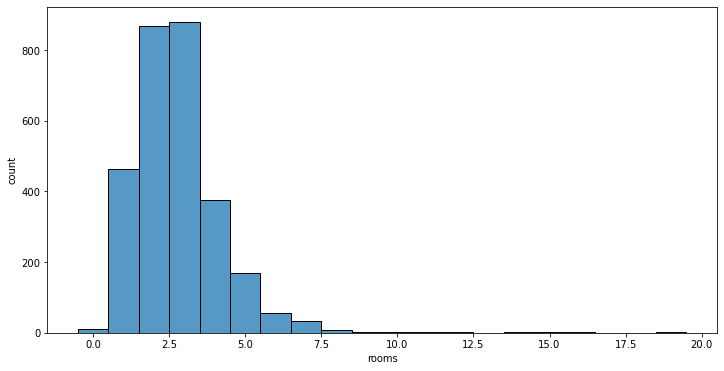

In [133]:
plt.figure(figsize=(12,6))
sns.histplot(spb_center['rooms'], discrete=True)
plt.xlabel('rooms')
plt.ylabel('count');

В центре Санкт-Петербурга преобладают двухкомнатные и трехкомнатные квартиры, тогда как в общей базе - однокомнатные и двухкомнатные. 

Высота потолков

In [72]:
spb_center['ceiling_height'].describe()

count    2872.000000
mean        2.915509
std         0.363434
min         2.400000
25%         2.650000
50%         2.750000
75%         3.100000
max         6.000000
Name: ceiling_height, dtype: float64

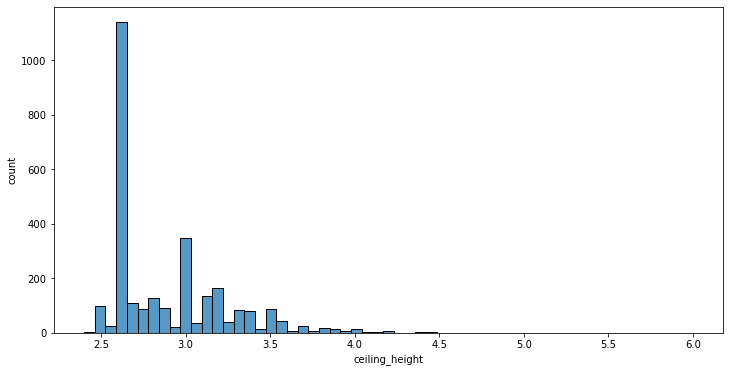

In [136]:
plt.figure(figsize=(12,6))
sns.histplot(spb_center['ceiling_height'])
plt.xlabel('ceiling_height')
plt.ylabel('count');

Высота потолков варьируется от 2,4 до 6 м, а средняя высота равна 2,9 м, что не намного выше среднего значения по всей базе

**Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?**

***Влияние числа комнат на стоимость квартиры***

In [74]:
spb_center['last_price'].corr(spb_center['rooms'])

0.34441146249510524

,last_price
rooms,
0,3.7400
1,5.8650
2,7.4000
3,9.5900
4,11.9000
5,14.2000
6,19.5000
7,25.0000
8,22.1900


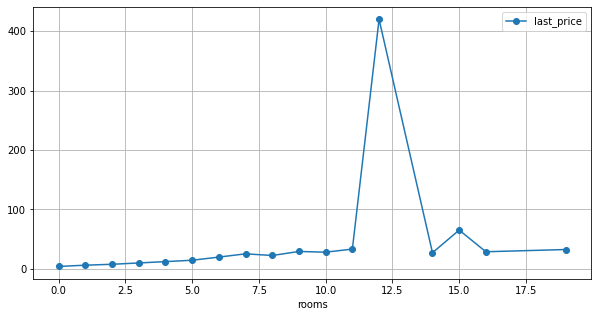

In [140]:
spb_rooms_table = spb_center.pivot_table(index='rooms', values='last_price', aggfunc='median')
spb_rooms_table.plot(grid=True, style='o-', figsize=(10,5))
spb_rooms_table

Здесь ситуация аналогична общей выборке: взаимосвязь есть, но слабая. Цена от увеличения числа комнат увеличивается, но есть исключения. 

***Влияние этажа на стоимость квартиры***

,last_price
floor_describe,
другой,9.17
первый,6.00
последний,8.81


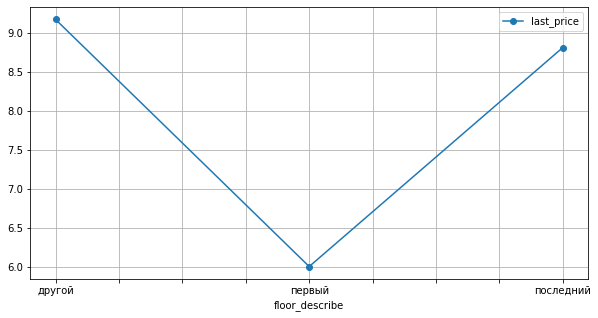

In [139]:
spb_floor_table = spb_center.pivot_table(index='floor_describe', values='last_price', aggfunc='median')
spb_floor_table.plot(grid=True, style='o-', figsize=(10,5))
spb_floor_table

Здесь такжк нет особенностей: квартиры на первом этаже стоят дешевле, чем на остальных. По общей базе разница в цене была примерно в 1.2 раза, в центре Санкт-Петербурга эта разница увеличилась до 1.5

***Влияние удаленности от центра на стоимость квартиры***

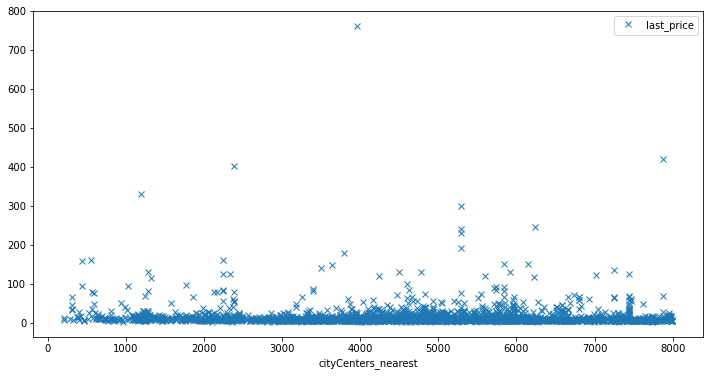

In [142]:
spb_center.plot(x='cityCenters_nearest', y='last_price', style='x', figsize=(12,6));

Так как выборка уже по центру Санкт-Петурбурга, зависимости нет

***Влияние даты размещения объявления на стоимость квартиры***

,last_price
day_week_exposition,
0,8.950
1,8.625
2,8.600
3,8.600
4,8.500
5,8.150
6,8.822


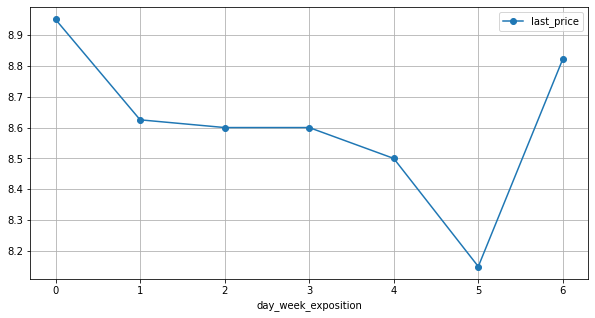

In [143]:
day_center = spb_center.pivot_table(index = 'day_week_exposition', values = 'last_price', aggfunc='median')
day_center.plot(grid=True, style='o-', figsize=(10,5))
day_center

В отличие от общей выборки, где максимум и минимум цен приходились на вторник и воскресенье соответственно, объявления о продаже квартир в центре Санкт-Петербурга с максимальной ценой публикуются в понедельник, а с минимальной - в субботу.

,last_price
month_exposition,
1,9.2930
2,8.8400
3,8.5900
4,8.4450
5,8.5515
6,8.5000
7,8.7000
8,8.5000
9,9.1500


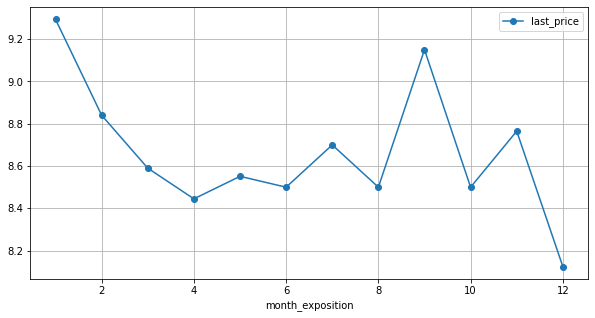

In [144]:
month_center = spb_center.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc='median')
month_center.plot(grid=True, style='o-', figsize=(10,5))
month_center

Здесь статистика отличается от общей базы, так как квартиры с минимальной ценой выставляются на продажу в декабре, а с максимальной - в январе и сентябре. 

,last_price
year_exposition,
2014,19.4450
2015,9.6800
2016,9.3500
2017,8.7000
2018,8.2945
2019,7.7000


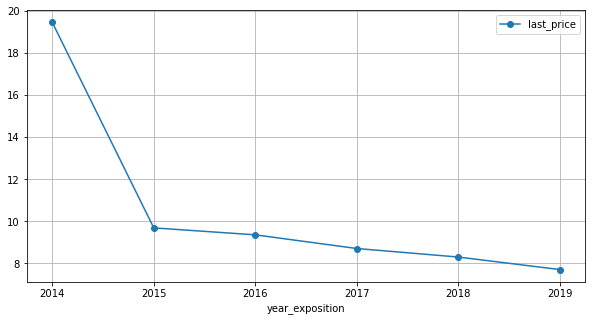

In [145]:
year_center = spb_center.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc='median')
year_center.plot(grid=True, style='o-', figsize=(10,5))
year_center

Как и общей выборке цены на квартиры в центре Санкт-Петербурга также снижались из года в год, но здесь снижение более резкое и нет роста после 2018 года. 

## Общий вывод

В ходе проведенного исследования мы обработали пропущенные значения, заполнив пропуски нулевыми или медианными значениями, заменили отображение даты, изменили тип данных на подходящий для дальнейшей работы. Рассчитали цену за квадратный метр, соотношение жилой площади и площади кухни к общей, вывели из даты дни недели, месяцы и года размещения объявления, добавили категории по этажам квартиры. Изучили следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры. Были выявлены аномалии. Удалены выбивающиеся значения высоты потолков. При изучении сроков продаж квартиры было обнаружено, что большое число объявлений удаляется спустя определенные промежутки времени, что, вероятно, связано с работой сервиса: эти объявления не включались в дальнейший анализ. Используя диаграмму размаха, мы выявили, что нормальным сроком продажи квартиры считается 0-500 дней. Мы выявили, что наибольшее влияние на стоимость квартиры оказывают ее общая площадь, количество комнат, удаленность от центра и этаж, на котором она расположена. Также можно отметить, что стоимость квартиры может меняться в зависимости от сезона, что связано со спросом. Но это, как и день, и год продажи оказывает наименьшее влияние.

Мы выделили центр Санкт-Петербурга радиусом 7 км, основываясь на резком снижении стоимости квартир в зависимости от удаления от центра города. 

Рассматривая те же параметры, но уже в центре города, мы выявили, что для него характерны примерно такие же показатели, как и для всей выборки в целом. Отличаются средняя площадь, средняя стоимость и темпы ее снижения.  

Таким, образом основными параметрами, определяющими рыночную стоимость квартиры, являются:
* площадь квартиры
* удаленность от центра
* этаж квартиры
* количество комнат